
# 3. Schwingung: Harmonischer Oszillator

Das Potential des harmonischen Oszillators in einer Dimension lautet:
$$
U(x) = \frac{1}{2} kx^2
$$

Für dieses Potential ergeben sich folgende Lösungen der Schrödingergleichung:
$$
E_n = \hbar \omega \left( n + \frac{1}{2} \right) ~~~ \omega = \frac{\hbar k^2}{m} \\
\Psi_n(x') = \underbrace{\sqrt{ \frac{1}{2^n n! \sqrt{\pi} }}}_{\text{Normierungskoeffizient}~C_n} 
\cdot \underbrace{H_n(x')}_{\text{Hermit-Polynom}} 
\cdot \underbrace{e^-\frac{x'^2}{2}}_{\text{Gauss-Kurve}} ~~\text{mit}~~x'= x \cdot \left(\frac{\hbar^2}{mk}\right)^{\left(\frac{-1}{4}\right)}
$$

Die sogenannten Hermitschen Polynome sind Lösungen spezieller Differentialgleichungen, die man nachschlagen kann. Die ersten drei Lösungen lauten:
$$
\begin{aligned}
E_0 = \frac{\hbar \omega}{2}  &\rightarrow \Psi_0(x') = \sqrt{ \frac{1}{\sqrt{\pi} }} e^-\frac{x'^2}{2} \\ 
E_1 = \frac{3 \hbar \omega}{2}  &\rightarrow \Psi_1(x') = \sqrt{ \frac{1}{2 \sqrt{\pi} }} 2x' e^-\frac{x'^2}{2} \\ 
E_2 = \frac{5 \hbar \omega}{2}  &\rightarrow \Psi_2(x') = \sqrt{ \frac{1}{8 \sqrt{\pi} }} \left( 4x'^2 -2 \right) e^-\frac{x'^2}{2} \\ 
\end{aligned}
$$

Diese lassen sich wie folgt visualisieren:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


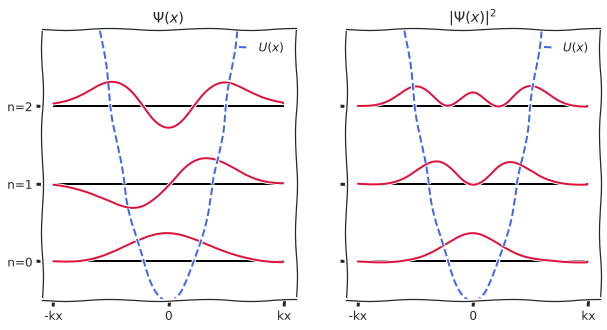

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.xkcd()
plt.style.use("seaborn-ticks")
plt.rcParams["legend.handlelength"] = 0.8
plt.rcParams["legend.framealpha"] = 0.8
font_name = "Arial"
font_size = 12
plt.rcParams.update({"font.sans-serif": font_name, "font.size": font_size})

n = np.array([0, 1, 2])
x = np.arange(-100, 100)

def energy(n, w):
    return w*(n+1/2)

def xval(x, mk):
    return x * (1/(mk))**(-1/4)

def wavefunction_n0(x):
    return np.sqrt(1/(np.sqrt(math.pi))) * np.exp(-((xval(x, 0.000001)**2)/ 2))

def wavefunction_n1(x):
    return np.sqrt(1/(2 * np.sqrt(math.pi))) * np.exp(-((xval(x, 0.000001)**2)/ 2)) * 2*xval(x, 0.000001)

def wavefunction_n2(x):
    return np.sqrt(1/(8 * np.sqrt(math.pi))) * np.exp(-((xval(x, 0.000001)**2)/ 2)) * (4*xval(x, 0.000001)**2-2)

fig, ax = plt.subplots(1,2 ,figsize=(10,5), sharey=True, sharex=True)
for i in n:
    ax[0].hlines(energy(i, 1), -100, 100)   
ax[0].plot(x, wavefunction_n0(x)/2 + energy(0, 1), color="crimson")
ax[0].plot(x, wavefunction_n1(x)/2 +  energy(1, 1), color="crimson")
ax[0].plot(x, wavefunction_n2(x)/2 + energy(2, 1), color="crimson")
ax[0].plot(x, xval(x, 0.000001)**2, color="royalblue", linestyle="--", label="$U(x)$")
ax[0].legend(loc="upper right")
ax[0].set_ylim(0, 3.5)
ax[0].set_yticks([energy(0, 1), energy(1, 1), energy(2, 1)])
ax[0].set_yticklabels(["n=0", "n=1", "n=2"])
ax[0].set_xticks([-100, 0,  100])
ax[0].set_xticklabels(["-kx", 0, "kx"])


for i in n:
    ax[1].hlines(energy(i, 1), -100, 100)   
ax[1].plot(x, wavefunction_n0(x)**2 /1.5 + energy(0, 1), color="crimson")
ax[1].plot(x, wavefunction_n1(x)**2 /1.5  +  energy(1, 1), color="crimson")
ax[1].plot(x, wavefunction_n2(x)**2 /1.5  + energy(2, 1), color="crimson")
ax[1].plot(x, xval(x, 0.000001)**2, color="royalblue", linestyle="--", label="$U(x)$")
ax[1].legend(loc="upper right")
ax[0].set_title("$\Psi(x)$")
ax[1].set_title("$|\Psi(x)|^2$")
plt.show()

Dabei sind folgende Merkmale wichtig:
- es gibt eine Nullpunktsenergie
- die Energien sind äquidistant
- Die Aufenthaltswahrscheinlichkeit sinkt mit $kx^2$, ist dadurch aber außerhalb des Potentials nicht 0!

In [2]:
# HIDDEN

import numpy as np 
import math
h = 6.626 * 10**(-34) # m2 kg / s
m = 9.109 * 10**(-31) #kg
eV = 6.2415093433 *10**(18)
nm = 10**(-9)
de = (h**2 * (49-16) * math.pi**2)/(2*m * (5 * nm)**2 * (2 * math.pi)**2) # J
de *= eV

c = 2.9979*10**(8) # m/s
h = 4.135667516 * 10**(-15) # eV*s
wavelength = h * c / de
wavelength /= nm
print("wavelength: {}, energy {}".format(wavelength, de))

def int_wavefunction(x, n, L):
    return (2/L) * ((x/2) - (L/(4*n*math.pi)) * np.sin((2*n * math.pi * x) / L))

a = int_wavefunction(0.45, 2, 1)
b = int_wavefunction(0.95, 2, 1)
print(a, b)
print(b - a)

wavelength: 2497.7963614187047, energy 0.4963702340880332
0.496774464189432 0.9967744641894319
0.49999999999999994
